In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/home/abiddisco/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/abiddisco/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/abiddisco/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start
    self.io_loop.start()
  File "/ho

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

# Preprocess and Prepare Data

In [ ]:
# !pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
    
# variable information 
statlog_german_credit_data.variables


# no missing values

name     role         type     demographic  \
0    Attribute1  Feature  Categorical            None   
1    Attribute2  Feature      Integer            None   
2    Attribute3  Feature  Categorical            None   
3    Attribute4  Feature  Categorical            None   
4    Attribute5  Feature      Integer            None   
5    Attribute6  Feature  Categorical            None   
6    Attribute7  Feature  Categorical           Other   
7    Attribute8  Feature      Integer            None   
8    Attribute9  Feature  Categorical  Marital Status   
9   Attribute10  Feature  Categorical            None   
10  Attribute11  Feature      Integer            None   
11  Attribute12  Feature  Categorical            None   
12  Attribute13  Feature      Integer             Age   
13  Attribute14  Feature  Categorical            None   
14  Attribute15  Feature  Categorical           Other   
15  Attribute16  Feature      Integer            None   
16  Attribute17  Feature  Categorical      Occupation   
17  Attribute18  Feature      Integer            None   
18  Attribute19  Feature       Binary            None   
19  Attribute20  Feature       Binary           Other   
20        class   Target       Binary            None   

                                          description   units missing_values  
0                 Status of existing checking account    None             no  
1                                            Duration  months             no  
2                                      Credit history    None             no  
3                                             Purpose    None             no  
4                                       Credit amount    None             no  
5                               Savings account/bonds    None             no  
6                            Present employment since    None             no  
7   Installment rate in percentage of disposable i...    None             no  
8                             Personal status and sex    None             no  
9                          Other debtors / guarantors    None             no  
10                            Present residence since    None             no  
11                                           Property    None             no  
12                                                Age   years             no  
13                            Other installment plans    None             no  
14                                            Housing    None             no  
15            Number of existing credits at this bank    None             no  
16                                                Job    None             no  
17  Number of people being liable to provide maint...    None             no  
18                                          Telephone    None             no  
19                                     foreign worker    None             no  
20                                  1 = Good, 2 = Bad    None             no

In [ ]:
X

Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0          A11           6        A34        A43        1169        A65   
1          A12          48        A32        A43        5951        A61   
2          A14          12        A34        A46        2096        A61   
3          A11          42        A32        A42        7882        A61   
4          A11          24        A33        A40        4870        A61   
..         ...         ...        ...        ...         ...        ...   
995        A14          12        A32        A42        1736        A61   
996        A11          30        A32        A41        3857        A61   
997        A14          12        A32        A43         804        A61   
998        A11          45        A32        A43        1845        A61   
999        A12          45        A34        A41        4576        A62   

    Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0          A75           4        A93        A101            4        A121   
1          A73           2        A92        A101            2        A121   
2          A74           2        A93        A101            3        A121   
3          A74           2        A93        A103            4        A122   
4          A73           3        A93        A101            4        A124   
..         ...         ...        ...         ...          ...         ...   
995        A74           3        A92        A101            4        A121   
996        A73           4        A91        A101            4        A122   
997        A75           4        A93        A101            4        A123   
998        A73           4        A93        A101            4        A124   
999        A71           3        A93        A101            4        A123   

     Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  \
0             67        A143        A152            2        A173   
1             22        A143        A152            1        A173   
2             49        A143        A152            1        A172   
3             45        A143        A153            1        A173   
4             53        A143        A153            2        A173   
..           ...         ...         ...          ...         ...   
995           31        A143        A152            1        A172   
996           40        A143        A152            1        A174   
997           38        A143        A152            1        A173   
998           23        A143        A153            1        A173   
999           27        A143        A152            1        A173   

     Attribute18 Attribute19 Attribute20  
0              1        A192        A201  
1              1        A191        A201  
2              2        A191        A201  
3              2        A191        A201  
4              2        A191        A201  
..           ...         ...         ...  
995            1        A191        A201  
996            1        A192        A201  
997            1        A191        A201  
998            1        A192        A201  
999            1        A191        A201  

[1000 rows x 20 columns]

In [ ]:
y

# 1 -> good
# 2 -> bad

class
0        1
1        2
2        1
3        1
4        2
..     ...
995      1
996      1
997      1
998      2
999      1

[1000 rows x 1 columns]

In [ ]:
from sklearn.preprocessing import OneHotEncoder


cat_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Categorical"].name)
numerical_features = X.drop(columns=cat_attr)
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_attr])
feature_names = encoder.get_feature_names_out(cat_attr)
df_encoded = pd.DataFrame(X_encoded, columns=feature_names)
df_final = pd.concat([numerical_features, df_encoded], axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


num_attr = list(statlog_german_credit_data.variables[statlog_german_credit_data.variables.type == "Integer"].name)
scaler = MinMaxScaler()
df_final[num_attr] = scaler.fit_transform(df_final[num_attr])

In [ ]:
# df_final.hist(figsize=(25, 15))

In [ ]:
# map all columns to proper attribute names

attribute_mapping = {
    'Attribute1_A11': 'Status checking account: lt 0 DM',
    'Attribute1_A12': 'Status checking account: 0 lte ... lt 200 DM',
    'Attribute1_A13': 'Status checking account: gte 200 DM ',
    'Attribute1_A14': 'Status checking account: no checking account',

    'Attribute2': 'Duration in month',

    'Attribute3_A30': 'Credit history: no credits taken / all credits paid back duly',
    'Attribute3_A31': 'Credit history: all credits at this bank paid back duly',
    'Attribute3_A32': 'Credit history: existing credits paid back duly till now',
    'Attribute3_A33': 'Credit history: delay in paying off in the past',
    'Attribute3_A34': 'Credit history: critical account / other credits existing',

    'Attribute4_A40': 'Purpose: car (new)',
    'Attribute4_A41': 'Purpose: car (used)',
    'Attribute4_A42': 'Purpose: furniture/equipment',
    'Attribute4_A43': 'Purpose: radio/television',
    'Attribute4_A44': 'Purpose: domestic appliances',
    'Attribute4_A45': 'Purpose: repairs',
    'Attribute4_A46': 'Purpose: education',
    'Attribute4_A48': 'Purpose: retraining',
    'Attribute4_A49': 'Purpose: business',
    'Attribute4_A410': 'Purpose: others',

    'Attribute5': 'Credit amount',

    'Attribute6_A61': 'Savings account/bonds: lt 100 DM',
    'Attribute6_A62': 'Savings account/bonds: 100 lte ... lt 500 DM',
    'Attribute6_A63': 'Savings account/bonds: 500 lte ... lt 1000 DM',
    'Attribute6_A64': 'Savings account/bonds: gte 1000 DM',
    'Attribute6_A65': 'Savings account/bonds: unknown / no savings account',

    'Attribute7_A71': 'Present employment since: unemployed',
    'Attribute7_A72': 'Present employment since: lt 1 year',
    'Attribute7_A73': 'Present employment since: 1 lte ... lt 4 years',
    'Attribute7_A74': 'Present employment since: 4 lte ... lt 7 years',
    'Attribute7_A75': 'Present employment since: gte 7 years',

    'Attribute8': 'Installment rate in percentage of disposable income',

    'Attribute9_A91': 'Personal status and sex: male - divorced/separated',
    'Attribute9_A92': 'Personal status and sex: female - divorced/separated/married',
    'Attribute9_A93': 'Personal status and sex: male - single',
    'Attribute9_A94': 'Personal status and sex: male - married/widowed',

    'Attribute10_A101': 'Other debtors / guarantors: none',
    'Attribute10_A102': 'Other debtors / guarantors: co-applicant',
    'Attribute10_A103': 'Other debtors / guarantors: guarantor',

    'Attribute11': 'Present residence since',

    'Attribute12_A121': 'Property: real estate',
    'Attribute12_A122': 'Property: building society savings agreement / life insurance',
    'Attribute12_A123': 'Property: car or other, not in attribute 6',
    'Attribute12_A124': 'Property: unknown / no property',

    'Attribute13': 'Age in years',

    'Attribute14_A141': 'Other installment plans: bank',
    'Attribute14_A142': 'Other installment plans: stores',
    'Attribute14_A143': 'Other installment plans: none',

    'Attribute15_A151': 'Housing: rent',
    'Attribute15_A152': 'Housing: own',
    'Attribute15_A153': 'Housing: for free',

    'Attribute16': 'Number of existing credits at this bank',

    'Attribute17_A171': 'Job: unemployed/unskilled - non-resident',
    'Attribute17_A172': 'Job: unskilled - resident',
    'Attribute17_A173': 'Job: skilled employee/official',
    'Attribute17_A174': 'Job: management/self-employed/highly qualified employee/officer',

    'Attribute18': 'nr of ppl being liable to provide maintenance for',

    'Attribute19': 'Telephone: none / yes',

    'Attribute20': 'Foreign worker'
}

df_final.rename(columns=attribute_mapping, inplace=True)

print(df_final.shape)

(1000, 59)


In [ ]:
num_attr = [attribute_mapping[attr] for attr in num_attr]

array([[<Axes: title={'center': 'Duration in month'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Age in years'}>, <Axes: >]], dtype=object)

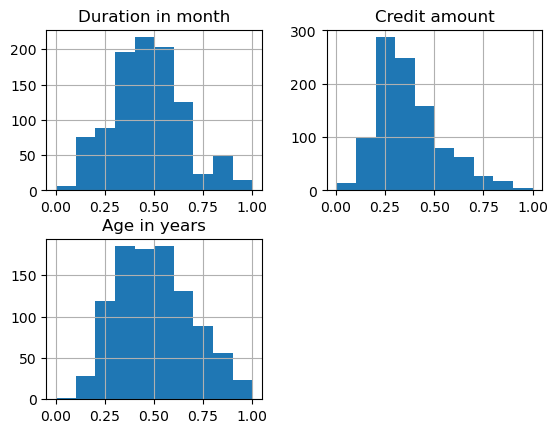

In [ ]:
df_final["Duration in month"] = np.sqrt(df_final["Duration in month"] + 0.00001)
df_final["Credit amount"] = np.sqrt(df_final["Credit amount"] + 0.00001)
# df_final["Attribute13"] = np.sqrt(df_final["Attribute13"] + 0.00001)
df_final["Age in years"] = np.sqrt(df_final["Age in years"] + 0.00001)


df_final[["Duration in month", "Credit amount", "Age in years"]].hist()

# for better model performance

In [ ]:
df_final["Telephone: none / yes"] = df_final["Telephone: none / yes"].map({"A192": 1, "A191": 0})
df_final["Foreign worker"] = df_final["Foreign worker"].map({"A202": 1, "A201": 0})

y["class"] = y["class"].map({1: 1, 2: 0})

/tmp/ipykernel_122444/1215279256.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["class"] = y["class"].map({1: 1, 2: 0})


In [ ]:
df_final.duplicated().sum()

# no duplicated data

0

# Analyze Data

Text(0.5, 1.0, 'target class distribution')

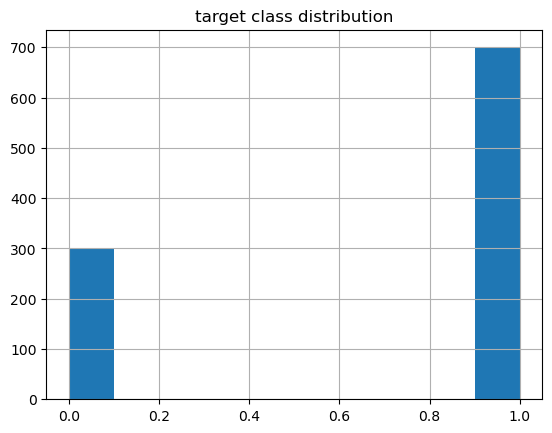

In [ ]:
y.hist()
plt.title("target class distribution")

In [ ]:
protected_attributes = ["Age in years", "Foreign worker", "Personal status and sex: male - divorced/separated", "Personal status and sex: female - divorced/separated/married", "Personal status and sex: male - single", "Personal status and sex: male - married/widowed"]

Text(0.5, 1.0, 'Correlation Matrix of protected attributes and target class')

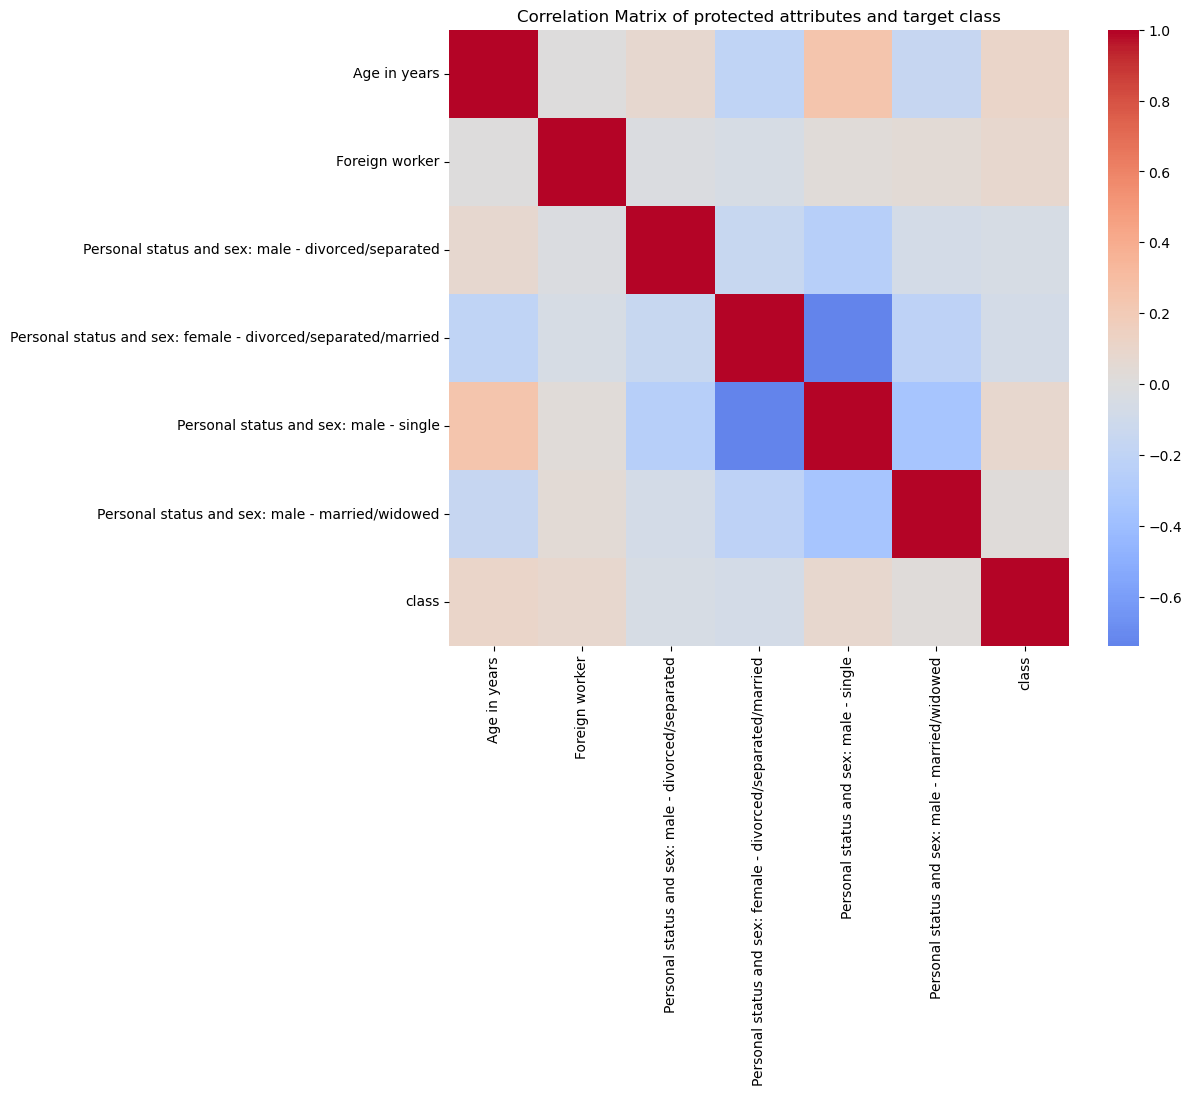

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
corr =  pd.concat([df_final[protected_attributes], y], axis=1).corr() 
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of protected attributes and target class")

Text(0.5, 0.98, 'numerical feature box plots')

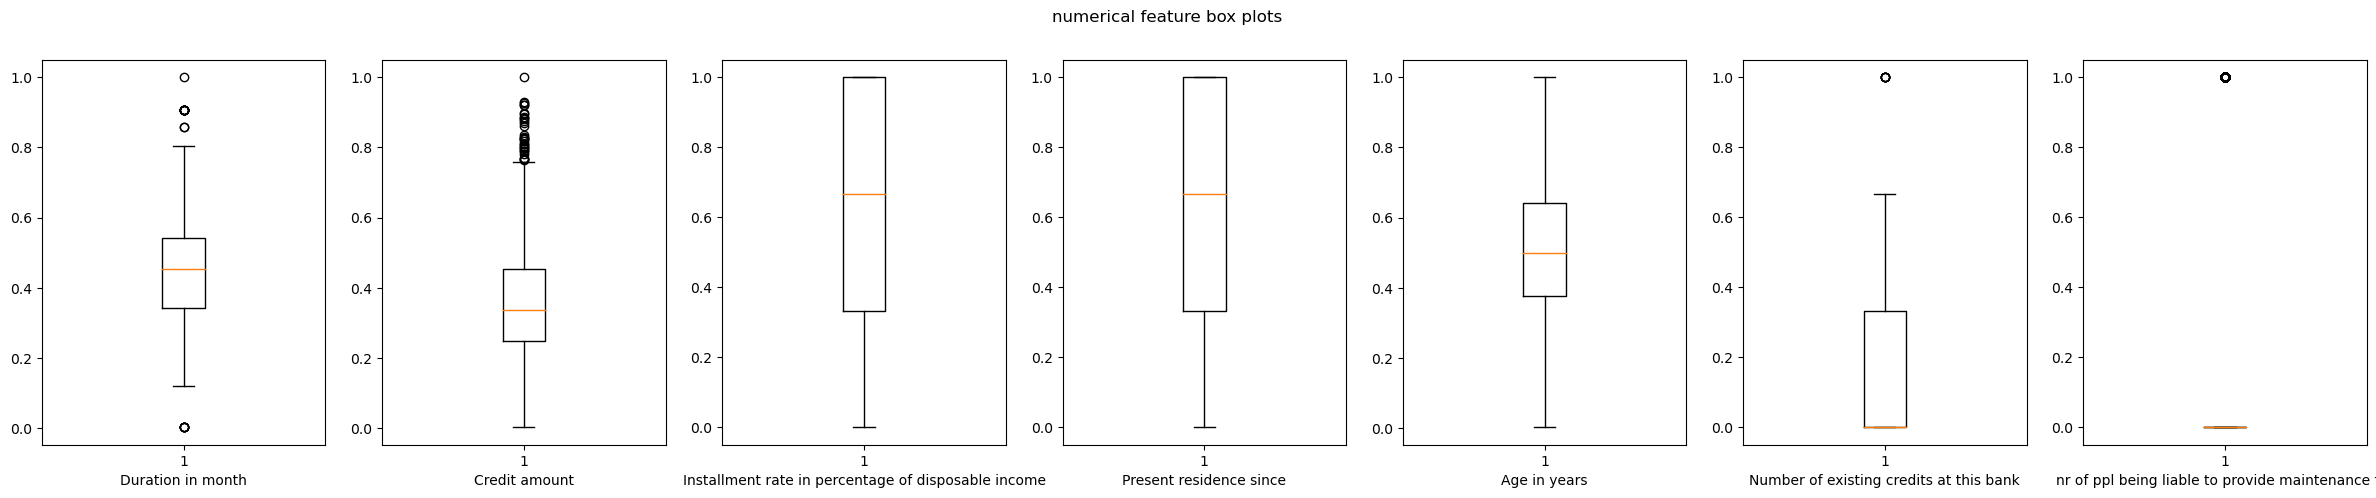

In [ ]:
fig, ax = plt.subplots(1, 7, figsize=(30, 5))

for i, att in enumerate(num_attr):
    ax[i].boxplot(df_final[att])
    ax[i].set_xlabel(att)
    
fig.suptitle("numerical feature box plots")

In [ ]:
# df_final.drop(columns=num_attr).hist(figsize=(40, 30));

# Analyze Data Focusing on Protected Attribute

candidates for protected attributes:
- Attribute9	Feature	Categorical	Marital Status	Personal status and sex	
- Attribute13	Feature	Integer	Age	years
- Attribute20	Feature	Binary	Other	foreign worker

potentially protected attributes:
- Attribute6	Feature	Categorical		Savings account/bonds
- Attribute7	Feature	Categorical	Other	Present employment since
- Attribute12	Feature	Categorical		Property
- Attribute15	Feature	Categorical	Other	Housing
- Attribute17	Feature	Categorical	Occupation	Job
- Attribute19	Feature	Binary		Telephone

In [ ]:
data = df_final

/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.

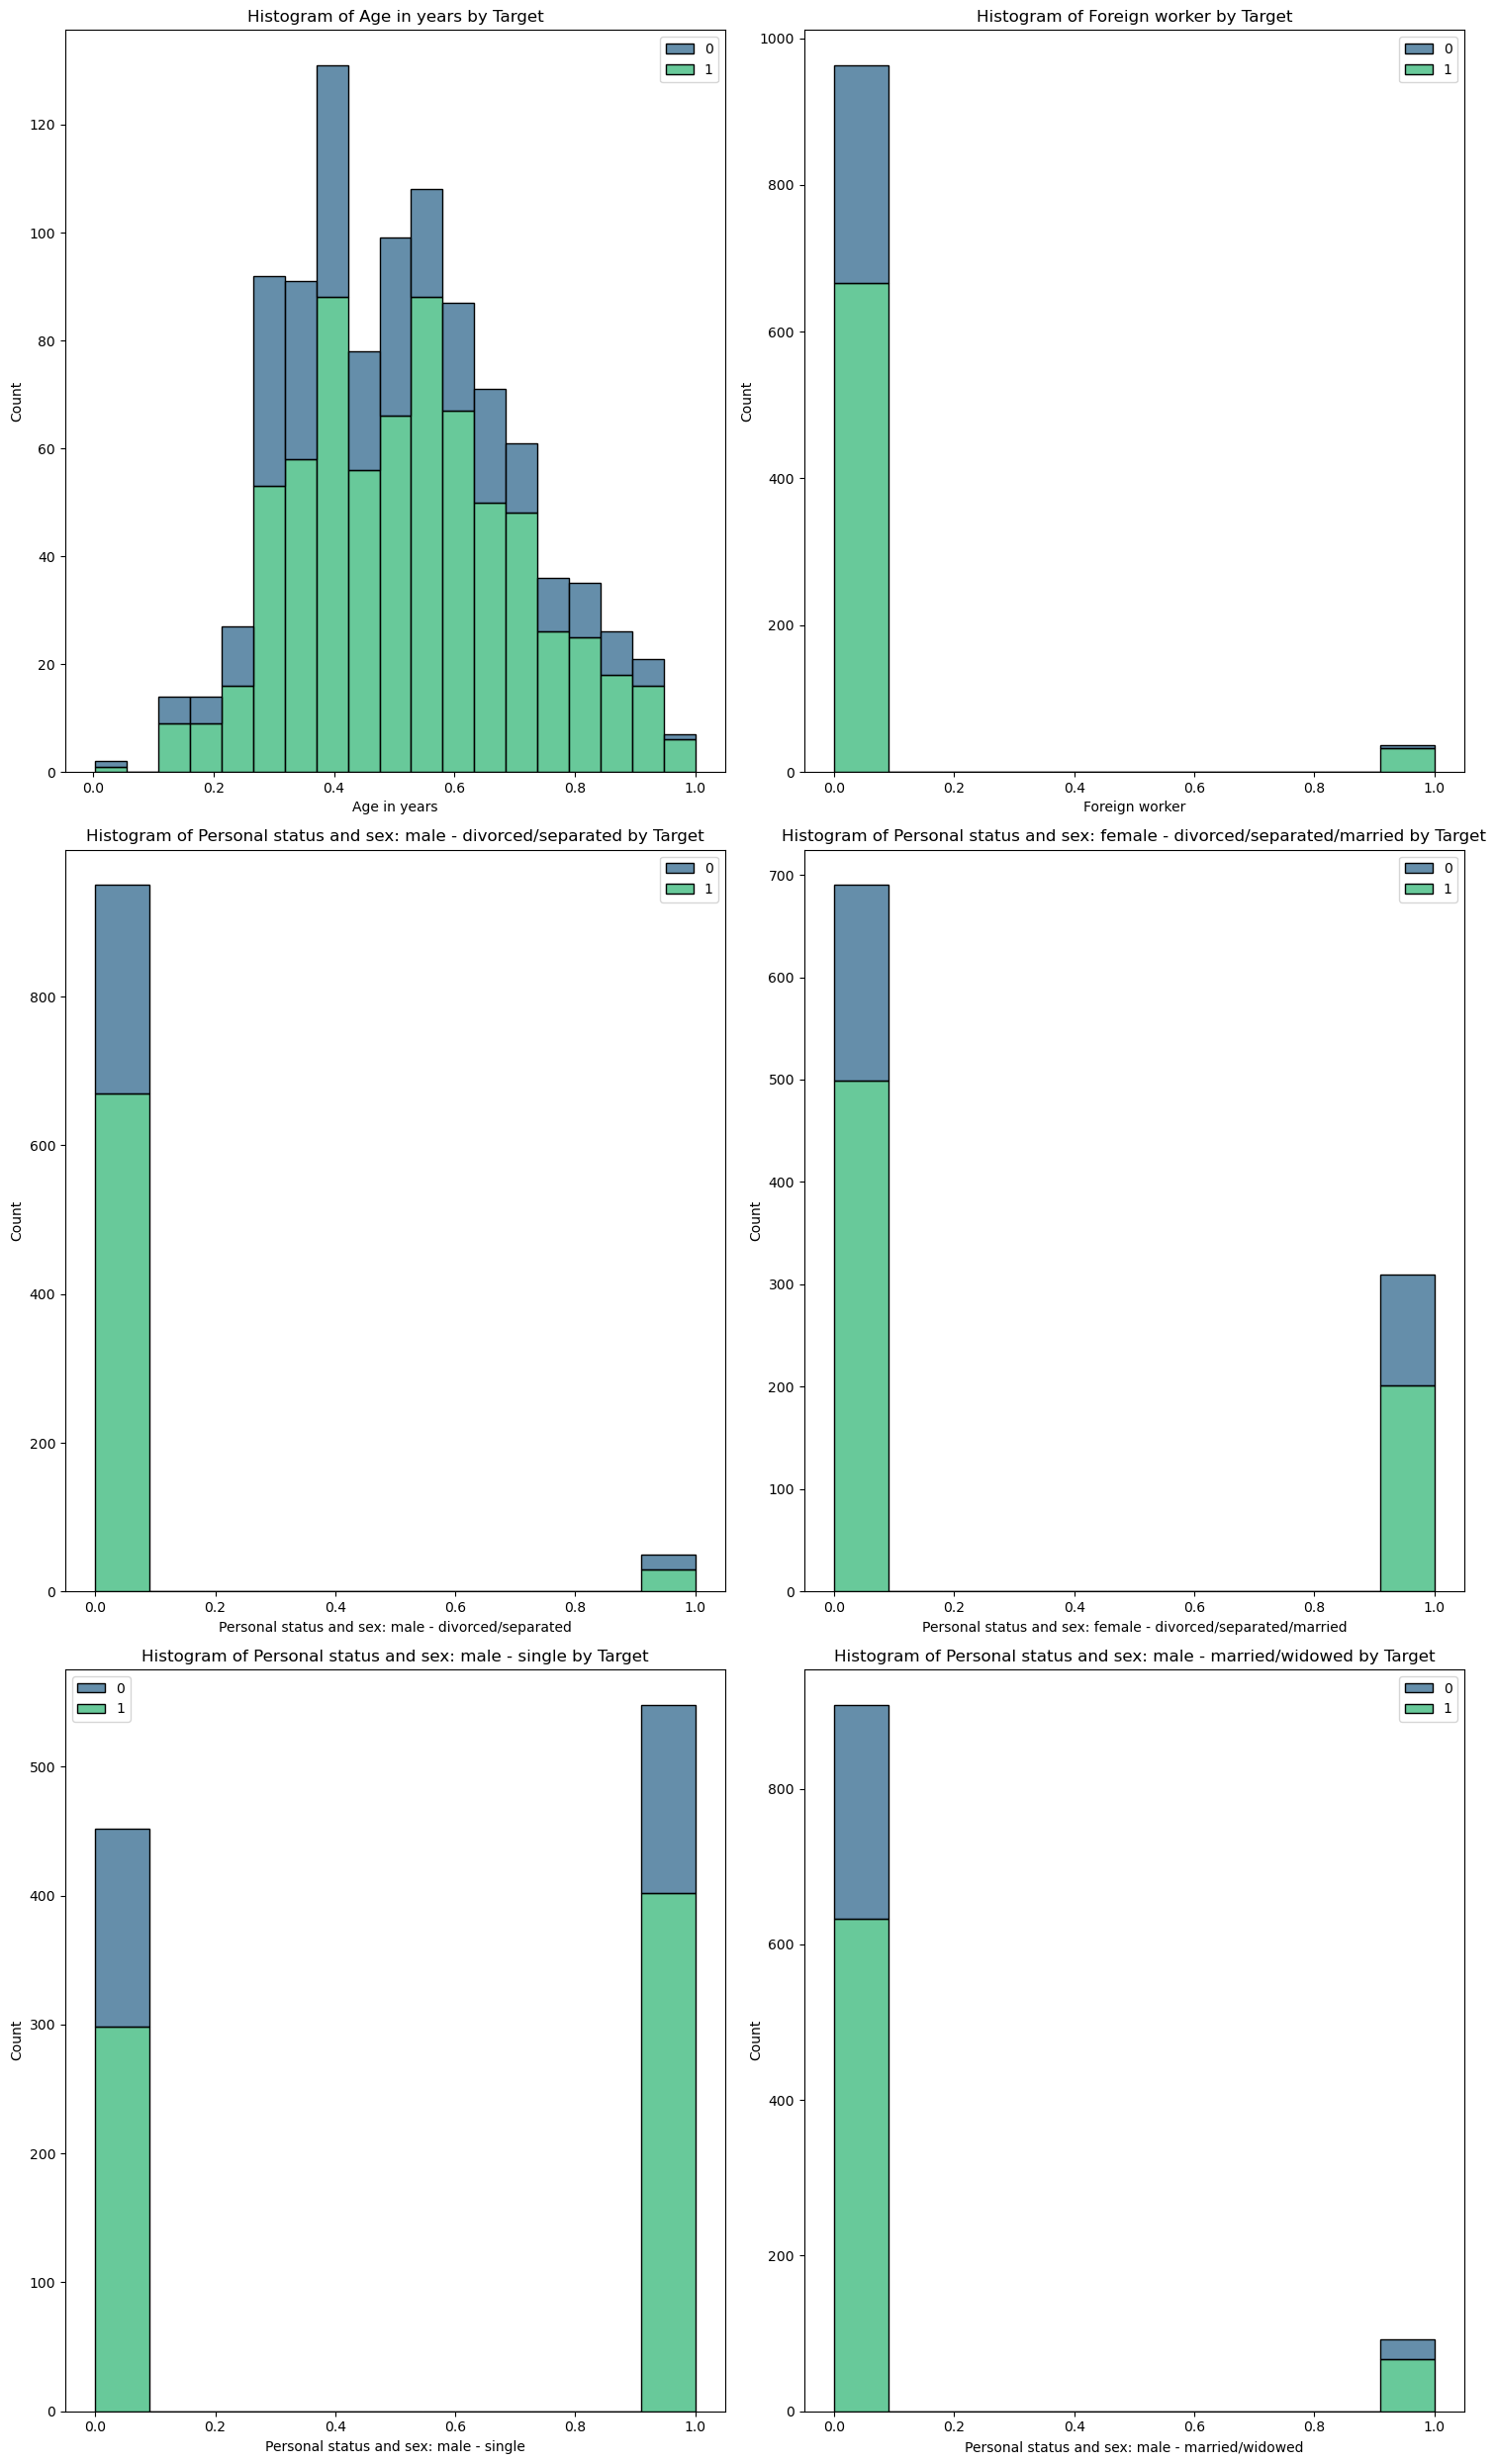

In [ ]:
fig, ax = plt.subplots(3, len(protected_attributes) // 3, figsize=(15, 25))

k = 0
for i in range(3):
    for j in range(len(protected_attributes) // 3):    
        sns.histplot(data=data, x=protected_attributes[k], hue=y["class"].values, palette='viridis', multiple='stack', ax=ax[i, j])
        ax[i, j].set_title(f"Histogram of {protected_attributes[k]} by Target")
        k += 1
    
plt.tight_layout()
plt.show()

In [ ]:
# data["Age in years"] = np.sqrt(data["Age in years"] + 0.00001)

# normalise the data

## observations
- No single females
- there are more divorced females than males
- Age is skewed
- there are just a few foreign workers
- males are about 50/50 single or not

Text(0.5, 1.0, 'Gender Count')

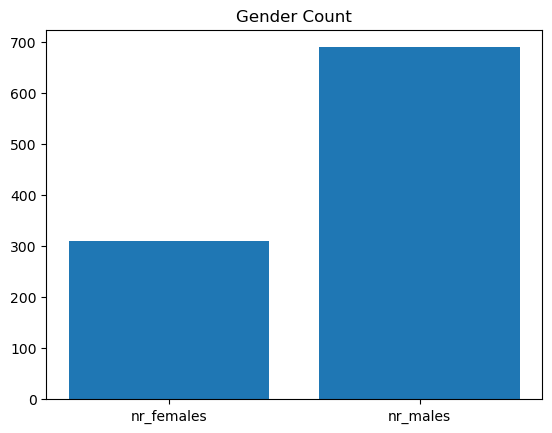

In [ ]:
nr_males = (X["Attribute9"][(X["Attribute9"] == "A91") | (X["Attribute9"] == "A93") | (X["Attribute9"] == "A94")]).count()
nr_females = (X["Attribute9"][(X["Attribute9"] == "A92") | (X["Attribute9"] == "A95")]).count()

plt.bar(x=["nr_females", "nr_males"], height=[nr_females, nr_males])
plt.title("Gender Count")

# Develop Machine Learning Models and Evaluate their Performance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [150, 155, 160],
    'max_depth': [None, 1, 2],
    'min_samples_split': [3, 4, 5],
    'min_samples_leaf': [1, 2, 3]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5, 
    scoring='f1',   # we use f1 since data is inbalanced
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 155}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.39      0.52        59
           1       0.79      0.95      0.86       141

    accuracy                           0.79       200
   macro avg       0.78      0.67      0.69       200
weighted avg       0.78      0.79      0.76       200



/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

param_grid = {
    'n_estimators': [75, 85, 95],
    'max_depth': [2, 3, 4],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.6, 0.7, 0.8]
}

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:58:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:58:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:58:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:58:16] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/home/abiddisco/anaconda3/lib/python3.11

Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 95, 'subsample': 0.5}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.53      0.60        59
           1       0.82      0.91      0.86       141

    accuracy                           0.80       200
   macro avg       0.76      0.72      0.73       200
weighted avg       0.79      0.80      0.79       200



/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [02:58:22] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(max_iter=500, random_state=42)

param_grid = {
    'hidden_layer_sizes': [(100,), (150,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.08, 0.1, 0.2]
}

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_mlp = grid_search.best_estimator_
y_pred = best_mlp.predict(X_test)

print("\nTest Set Classification Report:\n", classification_report(y_test, y_pred))

/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py

Fitting 5 folds for each of 12 candidates, totalling 60 fits


/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sha

Best Parameters: {'activation': 'tanh', 'alpha': 0.1, 'hidden_layer_sizes': (100,)}

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.66      0.64        59
           1       0.85      0.83      0.84       141

    accuracy                           0.78       200
   macro avg       0.74      0.75      0.74       200
weighted avg       0.78      0.78      0.78       200



/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### The best model is the XGB classifier. Thus we want to explain that one

# Explain the ML model(s) using an XAI technique

In [ ]:
import shap
import shap.plots
import lime.lime_tabular

### Shap

In [ ]:
"""rf_explainer = shap.TreeExplainer(best_rf, X_test)
rf_shap_values = rf_explainer(X_test)
rf_shap_values.values = rf_shap_values.values[:, :, 1]"""

xgb_explainer = shap.TreeExplainer(best_model) 
xgb_shap_values = xgb_explainer(X_test)

"""less_samples = shap.sample(X_test, int(len(X_test)*0.1))
mlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)
mlp_shap_values = mlp_explainer(X_test)
mlp_shap_values.values = mlp_shap_values.values[:, :, 1]"""

'less_samples = shap.sample(X_test, int(len(X_test)*0.1))\nmlp_explainer = shap.KernelExplainer(best_mlp.predict_proba, less_samples)\nmlp_shap_values = mlp_explainer(X_test)\nmlp_shap_values.values = mlp_shap_values.values[:, :, 1]'

In [ ]:
prot_att_idx = np.where(data.columns.isin(protected_attributes))[0]
prot_att_shap_vals = xgb_shap_values[:, prot_att_idx]

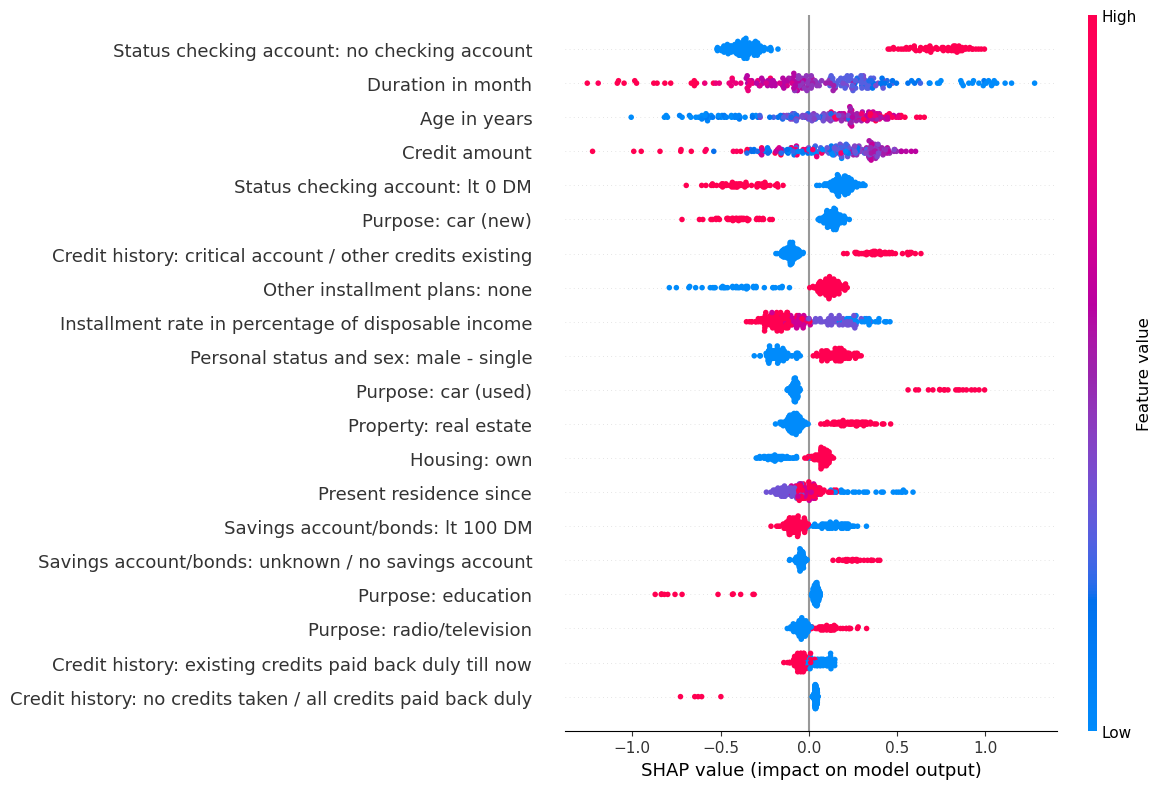

In [ ]:
shap.summary_plot(xgb_shap_values, X_test, plot_size=(12, 8))

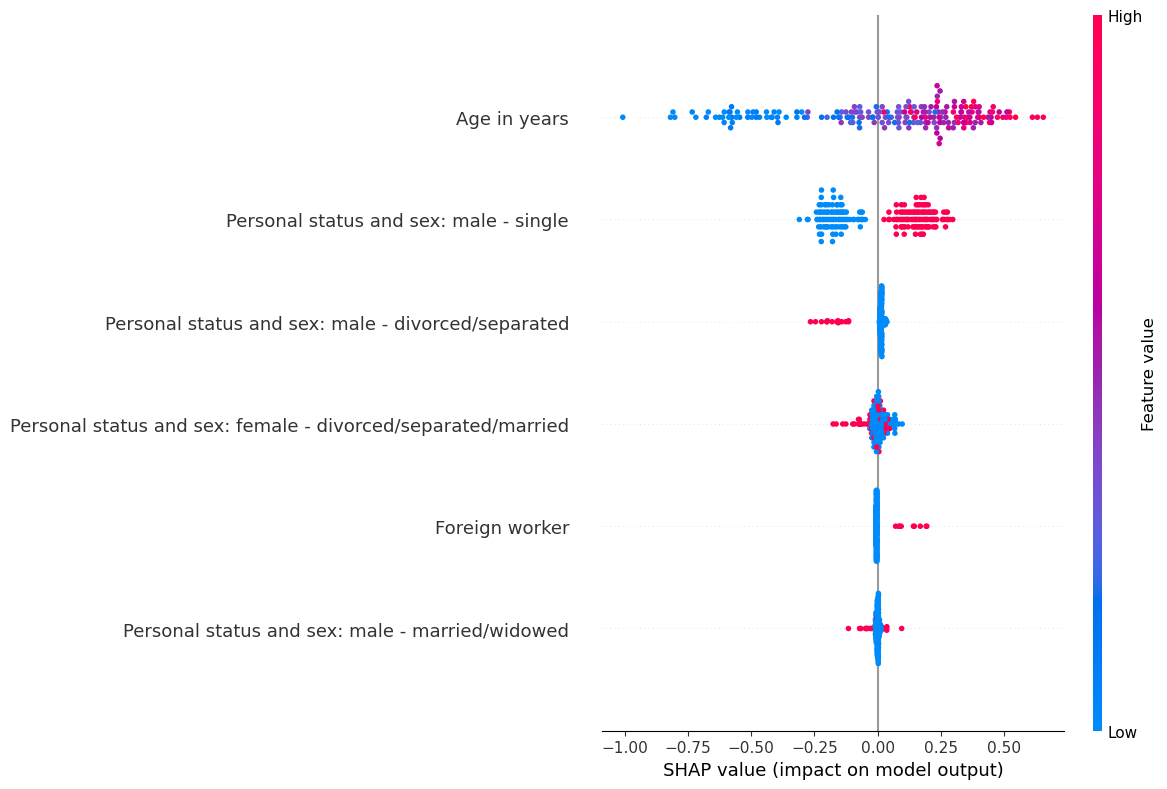

In [ ]:
shap.summary_plot(prot_att_shap_vals, X_test[protected_attributes], plot_size=(12, 8))

# age and a 3 personal status features seem to have an effect on the final prediction

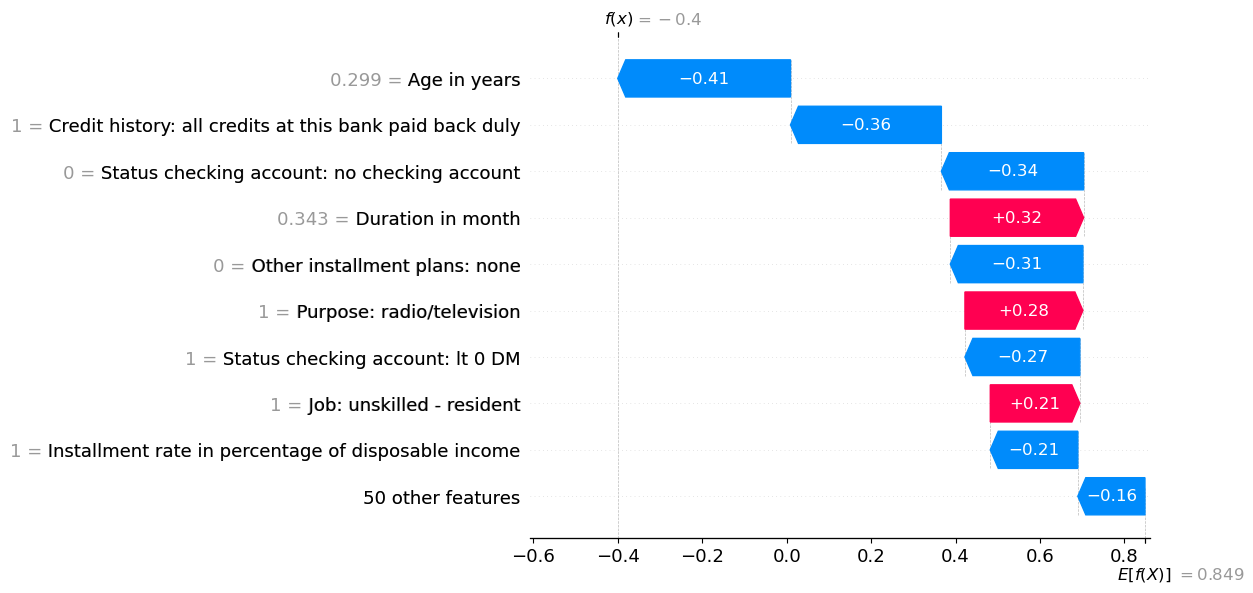

In [ ]:
rand_idx = randint(0, len(xgb_shap_values))

shap.plots.waterfall(xgb_shap_values[rand_idx])

# explanation for the first sample

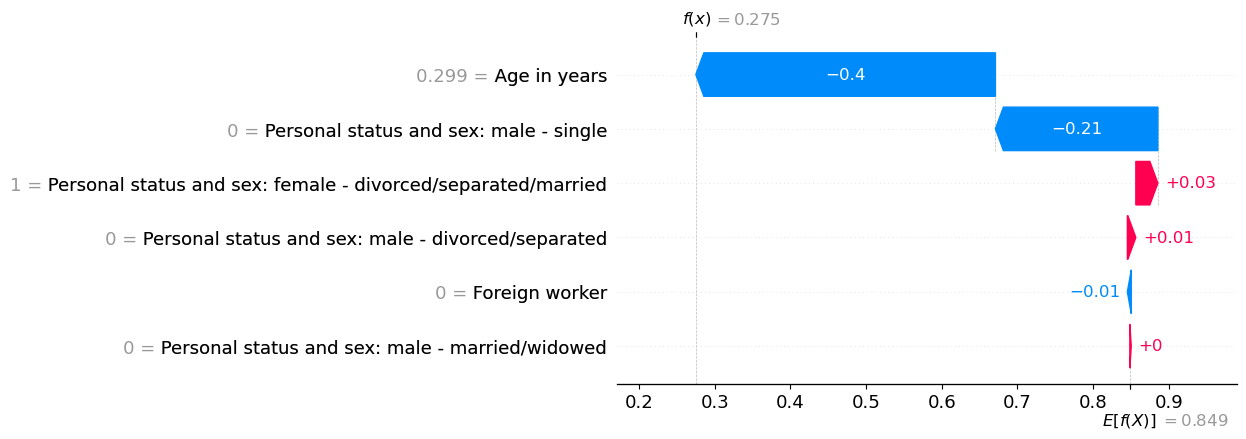

In [ ]:
shap.plots.waterfall(prot_att_shap_vals[0])

# shap value of protected attributes

In [ ]:
foreign_workers = X_test.reset_index()[X_test.reset_index()["Foreign worker"] == 1].index

# find foreign workers in X_test

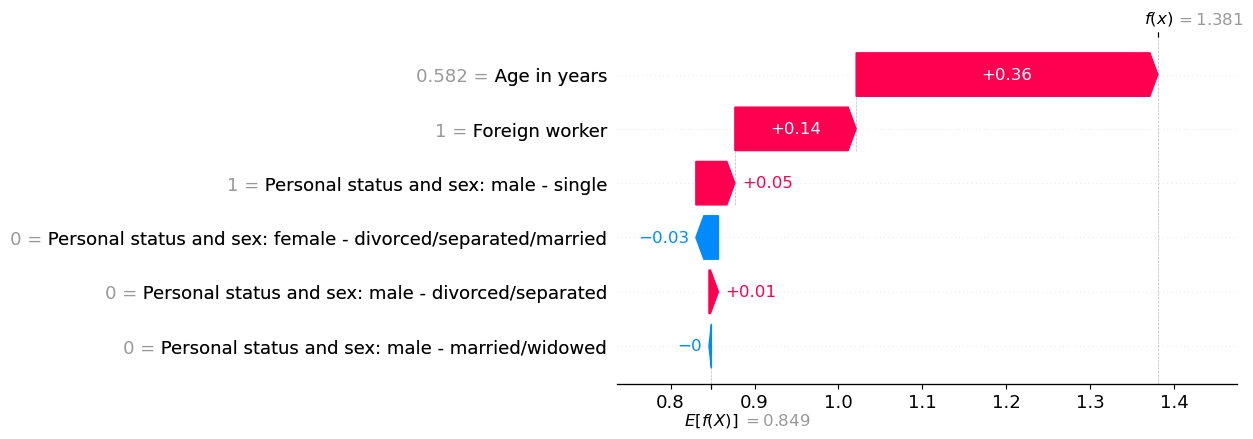

In [ ]:
shap.plots.waterfall(prot_att_shap_vals[foreign_workers[randint(0, len(foreign_workers))]])

# see if the waterfall plot is different for a foreign worker
# the model seems to be pretty unbiased regarding if an individual is a foreign worker or not

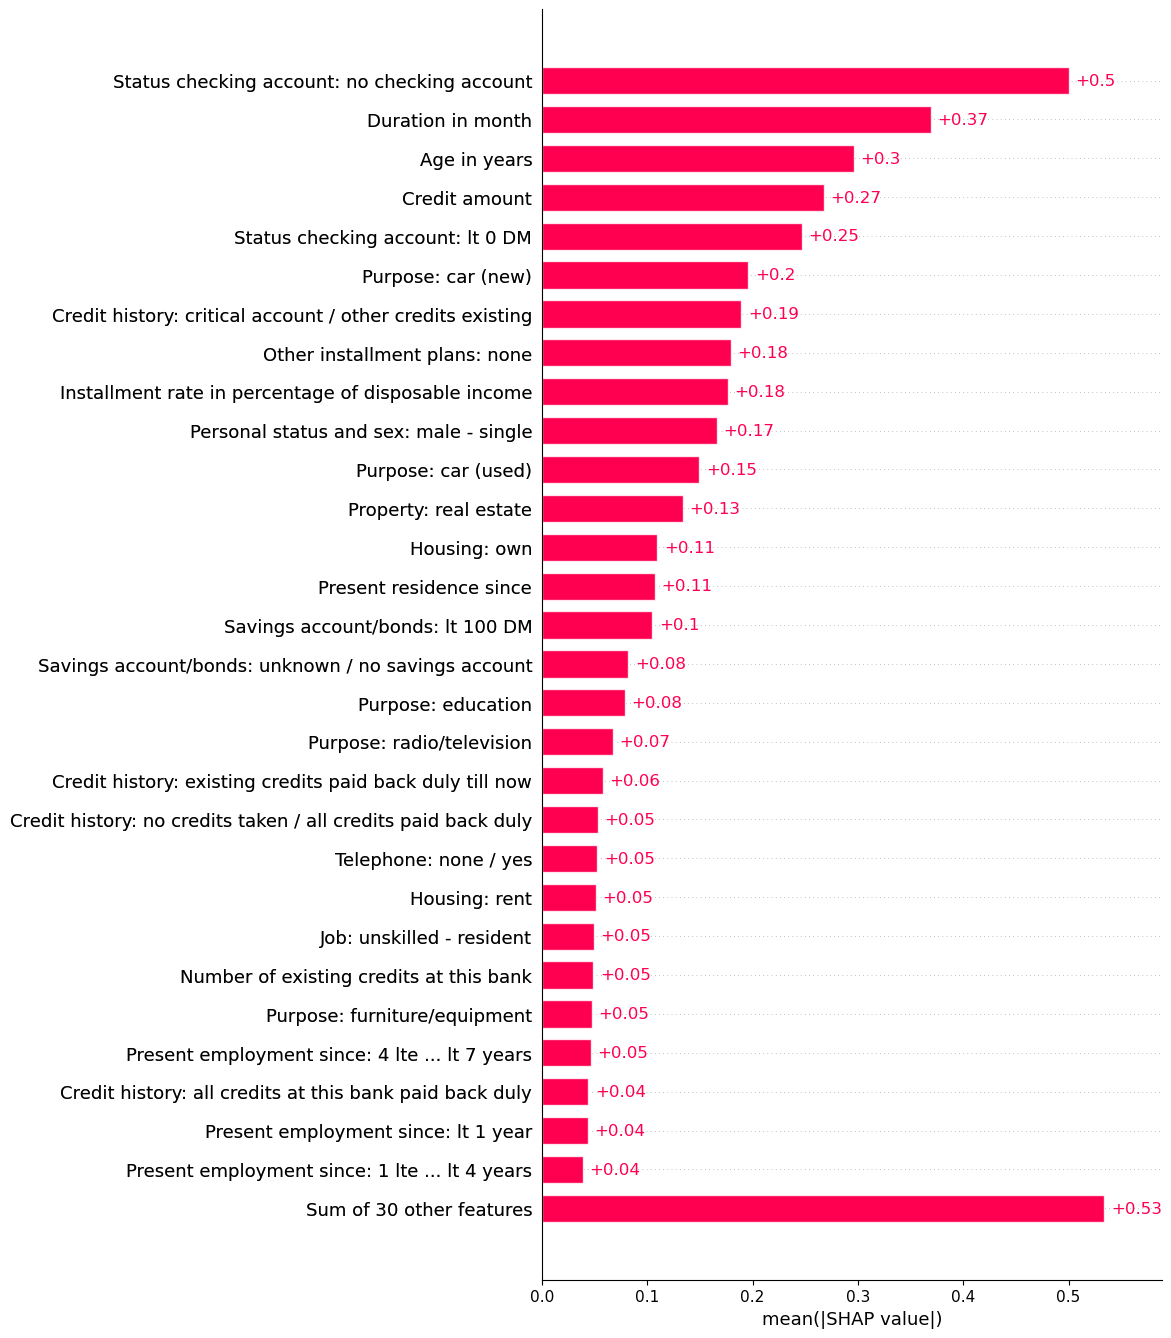

In [ ]:
shap.plots.bar(xgb_shap_values, max_display=30)


# plots the mean absolute shap value for all features considering all points

In [ ]:
shap_importance = -np.abs(xgb_shap_values.values).mean(axis=0)
most_important_feat = np.array(xgb_shap_values.feature_names)[shap_importance.argsort()][0]

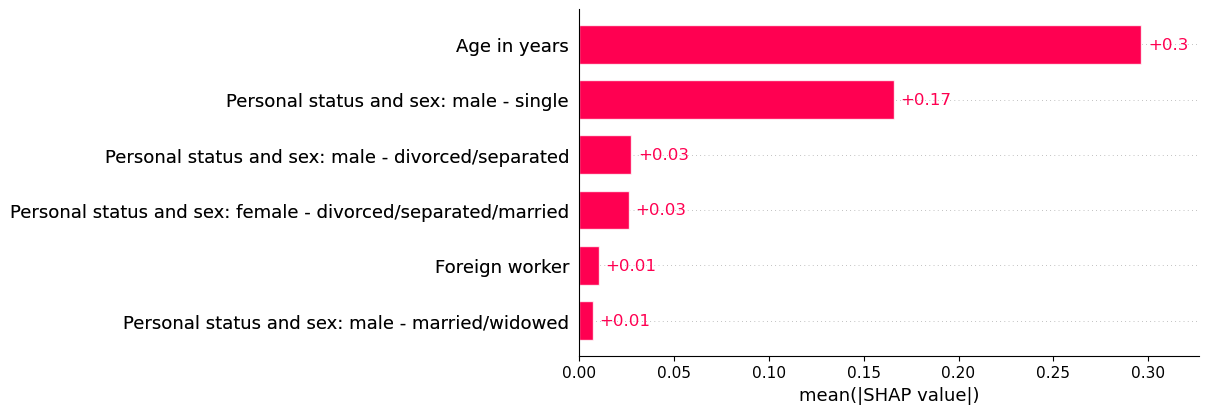

In [ ]:
shap.plots.bar(prot_att_shap_vals)

# protected attribute influence

In [ ]:
shap.initjs()
shap.plots.force(xgb_shap_values)

Text(0.5, 0.98, 'shap value of protected features')

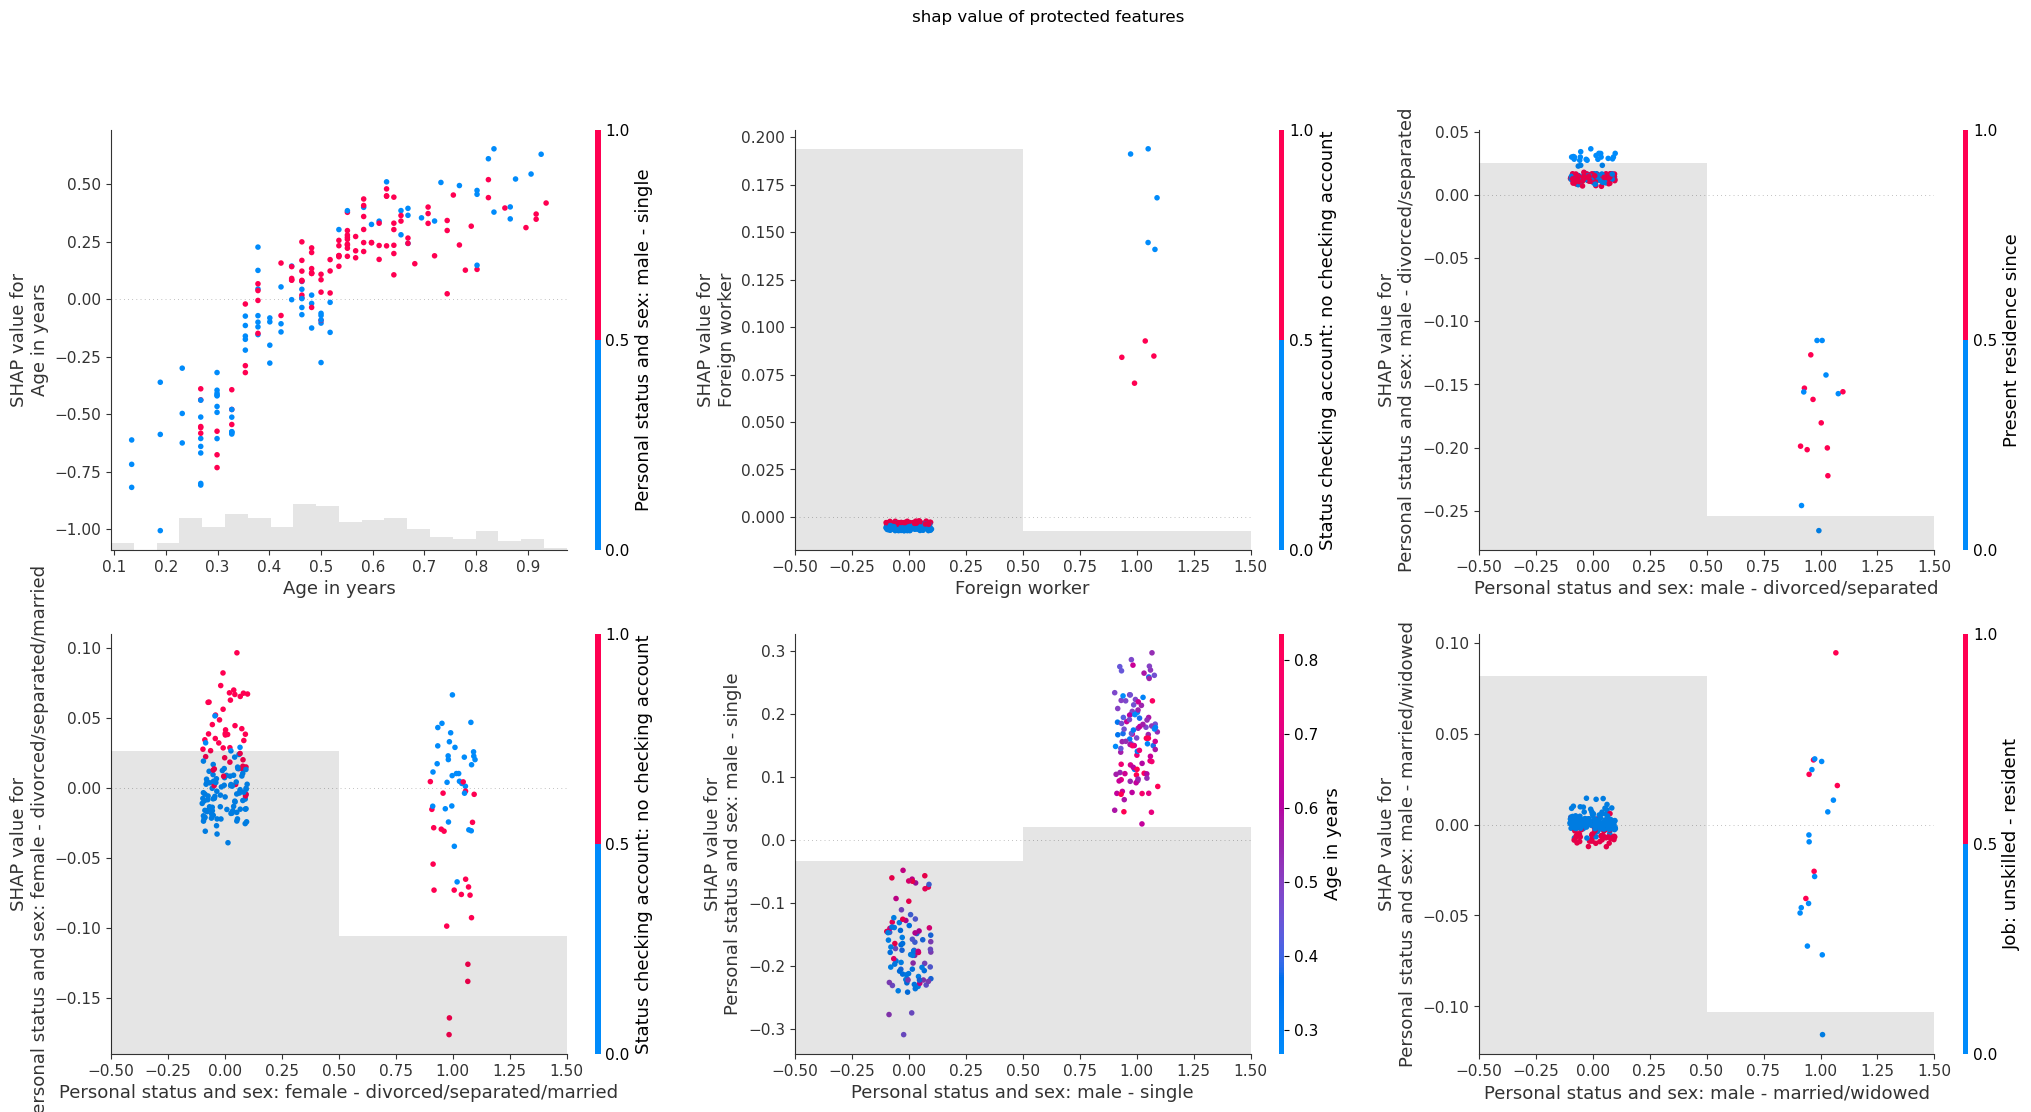

In [ ]:
fig, ax = plt.subplots(2, len(protected_attributes) // 2, figsize=(25, 12))

k = 0
for i in range(2):
    for j in range(len(prot_att_idx) // 2):
        shap.plots.scatter(prot_att_shap_vals[:, k], ax=ax[i, j], show=False, color=xgb_shap_values)
        k += 1
        
fig.suptitle("shap value of protected features")

# the color is the feature which has the strongest interaction with the plotted feature

# def: interaction
# an interaction doesnt mean corelation (eg. rain x traffic = high incident rate, but rain and traffic are not crorelated)
# in our case age and creadit amount have the highest interaction (plot 0, 0) so ~higher age and ~higher credit amount = high shap value

### Lime

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    X_test.values, 
    feature_names=list(X_test.columns), 
    discretize_continuous=True
)

In [ ]:
idx = prot_att_idx[0]
instance = X_test.iloc[idx]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)

# 1 -> good
# 0 -> bad"""

/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

In [ ]:
idx = foreign_workers[0]
instance = X_test.iloc[idx]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)

/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

In [ ]:
import random

instance = X_test.iloc[random.randint(0, len(X_test))]

explanation = explainer.explain_instance(
    instance,
    best_model.predict_proba,
    num_features=(len(feature_names) // 4),
)

explanation.show_in_notebook(show_table=True, show_all=False)

/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
/home/abiddisco/anaconda3/lib/python3.11/site-packages/lime/lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

# Enhance the Fairness of the ML Model

In [ ]:
X_test["Age in years"] = pd.cut(
    X_test["Age in years"],
    bins=[0, 0.25, 0.4, 0.6, 1.1],
    labels=[0, 1, 2, 3]
).astype(float)

X_train["Age in years"] = pd.cut(
    X_train["Age in years"],
    bins=[0, 0.25, 0.4, 0.6, 1.1],
    labels=[0, 1, 2, 3]
).astype(float)

# need to discretize the continous features for fairlearn to be able to work best

In [ ]:
# top_protected_attr = ["Age in years", "Personal status and sex: male - single"]

# top_protected_attr = protected_attributes

top_protected_attr = ["Age in years"]

In [ ]:
from sklearn.metrics import accuracy_score
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference

#y_pred = best_model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred)
dp_difference = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])
eo_difference =  equalized_odds_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Demographic Parity Difference: {dp_difference:.4f}")
print(f"Equalized Odds Difference: {eo_difference:.4f}")

Baseline Model Accuracy: 0.7800
Demographic Parity Difference: 0.1728
Equalized Odds Difference: 0.4783


In [ ]:
"""def dp_fair_metric(estimator, X, y_true):
    y_pred = estimator.predict(X)
    value = -demographic_parity_difference(y_true, y_pred, sensitive_features=X_train[top_protected_attr])
    return value"""

'def dp_fair_metric(estimator, X, y_true):\n    y_pred = estimator.predict(X)\n    value = -demographic_parity_difference(y_true, y_pred, sensitive_features=X_train[top_protected_attr])\n    return value'

In [ ]:
"""def eo_fair_metric(estimator, X, y_true):
    y_pred = estimator.predict(X)
    value = -equalized_odds_difference(y_true, y_pred, sensitive_features=X_train[top_protected_attr])
    return value"""

'def eo_fair_metric(estimator, X, y_true):\n    y_pred = estimator.predict(X)\n    value = -equalized_odds_difference(y_true, y_pred, sensitive_features=X_train[top_protected_attr])\n    return value'

In [ ]:
"""from sklearn.metrics import make_scorer

dp_fair_scorer = make_scorer(dp_fair_metric, greater_is_better=True)
eo_fair_scorer = make_scorer(eo_fair_metric, greater_is_better=True)"""

'from sklearn.metrics import make_scorer\n\ndp_fair_scorer = make_scorer(dp_fair_metric, greater_is_better=True)\neo_fair_scorer = make_scorer(eo_fair_metric, greater_is_better=True)'

### fairness through unawarneness (pre-processing)

In [ ]:
X_train_wo_top_prot_attr = X_train.drop(columns=top_protected_attr)
X_test_wo_top_prot_attr = X_test.drop(columns=top_protected_attr)

model_wo_prot_attr = xgb.XGBClassifier()

param_grid = {
    'n_estimators': [60, 75, 80],
    'max_depth': [1, 4, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.3, 0.4, 0.5],
    'colsample_bytree': [0.2, 0.6, 0.8]
}

unaware_model_grid_search = GridSearchCV(
    estimator=model_wo_prot_attr,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

unaware_model_grid_search.fit(X_train_wo_top_prot_attr, y_train)

print("Best Parameters:", unaware_model_grid_search.best_params_)

y_pred = unaware_model_grid_search.predict(X_test_wo_top_prot_attr)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'colsample_bytree': 0.2, 'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 80, 'subsample': 0.4}


In [ ]:
baseline_accuracy = accuracy_score(y_test, y_pred)
dp_difference = demographic_parity_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])
eo_difference =  equalized_odds_difference(y_test, y_pred, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {baseline_accuracy:.4f}")
print(f"Demographic Parity Difference: {dp_difference:.4f}")
print(f"Equalized Odds Difference: {eo_difference:.4f}")

Baseline Model Accuracy: 0.7750
Demographic Parity Difference: 0.1656
Equalized Odds Difference: 0.6842


### fairness in model training (in-processing)

In [ ]:

from fairlearn.reductions import ExponentiatedGradient, DemographicParity, EqualizedOdds

# constraint = DemographicParity()
constraint = EqualizedOdds()
classifier = xgb.XGBClassifier(eval_metric='mlogloss')

mitigator = ExponentiatedGradient(classifier, constraint)

# do grid search

param_grid = {
    'eps': [0.01, 0.1, 1],
    'max_iter': [10, 20, 50],
    "nu": [0.0000001, 0.000001, 0.00001],
    'run_linprog_step': [True, False],
}


mitigator_grid_search = GridSearchCV(
    estimator=mitigator,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,   
    n_jobs=-1,
    verbose=1
)

mitigator_grid_search.fit(X_train, y_train, sensitive_features=X_train[top_protected_attr])

y_pred_mitigated = mitigator_grid_search.predict(X_test)

mitigator_grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7eafb3339fd0>>
Traceback (most recent call last):
  File "/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 640, in _next_wrapper
Exception ignored on calling ctypes callback function: <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7c346c726f50>>
Traceback (most recent call last):
  File "/home/abiddisco/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 640, in _next_wrapper
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
    return self._handle_exception(lambda: int(self.next(input_data)), 0)
Exception ignored on calling ctypes callback function:      <bound method DataIter._next_wrapper of <xgboost.data.SingleBatchInternalIter object at 0x7f99257bb850>>  
  Traceback (most recent call last):
  ^  File "/home/abiddisco/anaconda3/lib/pyt

KeyboardInterrupt: 

In [ ]:
exp_grad_accuracy = accuracy_score(y_test, y_pred_mitigated)
exp_grad_dp_difference = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=X_test[top_protected_attr])
exp_grad_eo_difference =  equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=X_test[top_protected_attr])

print(f"Baseline Model Accuracy: {exp_grad_accuracy:.4f}")
print(f"Demographic Parity Difference: {exp_grad_dp_difference:.4f}")
print(f"Equalized Odds Difference: {exp_grad_eo_difference:.4f}")

Baseline Model Accuracy: 0.7700
Demographic Parity Difference: 0.1874
Equalized Odds Difference: 0.5263


### fairness with threshold optimizer (post-processing)

In [ ]:
from fairlearn.postprocessing import ThresholdOptimizer

classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [5, 10, 100],
    'max_depth': [10, 20, 100],
    'max_leaf_nodes': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,   
    n_jobs=-1,
    verbose=1
)

threshold_optimizer = ThresholdOptimizer(
    estimator=grid_search,
    constraints="demographic_parity",
    objective="balanced_accuracy_score",
    predict_method="predict_proba",
    prefit=False
    )

# since we can only give it 1 protected attribute we give it age in years

threshold_optimizer.fit(X_train, y_train, sensitive_features=X_train["Age in years"])
y_pred_mitigated = threshold_optimizer.predict(X_test, sensitive_features=X_test["Age in years"], random_state=42)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/home/abiddisco/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. P

In [ ]:
threshold_optimizer_accuracy = accuracy_score(y_test, y_pred_mitigated)
threshold_optimizer_dp_difference = demographic_parity_difference(y_test, y_pred_mitigated, sensitive_features=X_test["Age in years"])
threshold_optimizer_eo_difference =  equalized_odds_difference(y_test, y_pred_mitigated, sensitive_features=X_test["Age in years"])

print(f"Baseline Model Accuracy: {threshold_optimizer_accuracy:.4f}")
print(f"Demographic Parity Difference: {threshold_optimizer_dp_difference:.4f}")
print(f"Equalized Odds Difference: {threshold_optimizer_eo_difference:.4f}")

Baseline Model Accuracy: 0.6950
Demographic Parity Difference: 0.1921
Equalized Odds Difference: 0.2105


# Compare Performance of ML Models

In [ ]:
models = mitigator_grid_search.best_estimator_.predictors_
weights = mitigator_grid_search.best_estimator_.weights_

fairest_model = models[np.argmax(weights)]      # in-processing approach

# fairest_model = threshold_optimizer       # post-processing approach

# fairest_model = unaware_model_grid_search.best_estimator_     # pre-processing approach

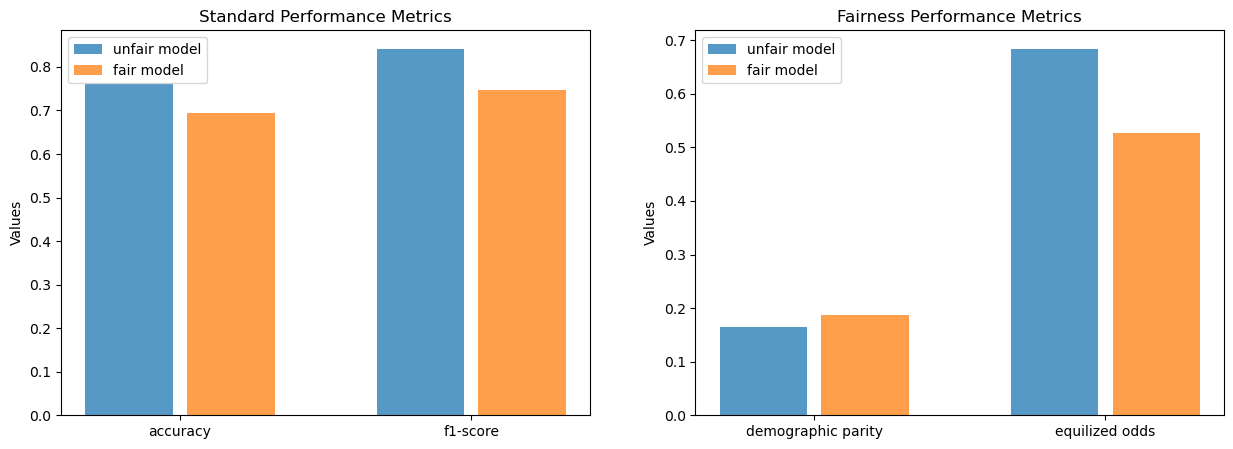

In [ ]:
from sklearn.metrics import f1_score

y_pred_unfair_model = best_model.predict(X_test)
y_pred_fair_model = fairest_model.predict(X_test)   # X_test_wo_top_prot_attr) #, sensitive_features=X_test[top_protected_attr])

acc_unfair_model = accuracy_score(y_test, y_pred_unfair_model)
acc_fair_model = accuracy_score(y_test, y_pred_mitigated)

f1_unfair_model = f1_score(y_test, y_pred_unfair_model)
f1_fair_model = f1_score(y_test, y_pred_mitigated)

db_diff_fair = demographic_parity_difference(y_test, y_pred_fair_model, sensitive_features=X_test[top_protected_attr])
eo_fair = equalized_odds_difference(y_test, y_pred_fair_model, sensitive_features=X_test[top_protected_attr])

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
width = 0.35

ax[0].bar(np.array([0, 1]) - width / 2, [acc_unfair_model, f1_unfair_model], width - 0.05, label = "unfair model", alpha=0.75)
ax[0].bar(np.array([0, 1]) + width / 2, [acc_fair_model, f1_fair_model], width - 0.05, label="fair model", alpha=0.75)

ax[1].bar(np.array([0, 1]) - width / 2, [dp_difference, eo_difference], width - 0.05, label = "unfair model", alpha=0.75)
ax[1].bar(np.array([0, 1]) + width / 2, [db_diff_fair, eo_fair], width - 0.05, label = "fair model", alpha=0.75)

ax[0].set_xticks([0, 1])
ax[0].set_xticklabels(["accuracy", "f1-score"])
ax[0].set_ylabel('Values')
ax[0].set_title('Standard Performance Metrics')
ax[0].legend()

ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(["demographic parity", "equilized odds"])
ax[1].set_ylabel('Values')
ax[1].set_title('Fairness Performance Metrics')
ax[1].legend()

# we selected the model enhanced with fairness which performs best in terms of fairness and accuracy

# Explain the ML Model Developed with Enhanced Fairness

In [ ]:
fair_explainer = shap.Explainer(fairest_model) # mitigator.predictors_[0]
fair_shap_values = fair_explainer(X_test)

In [ ]:
prot_att_idx = np.where(data.columns.isin(protected_attributes))[0]
prot_att_shap_vals = fair_shap_values[:, prot_att_idx]

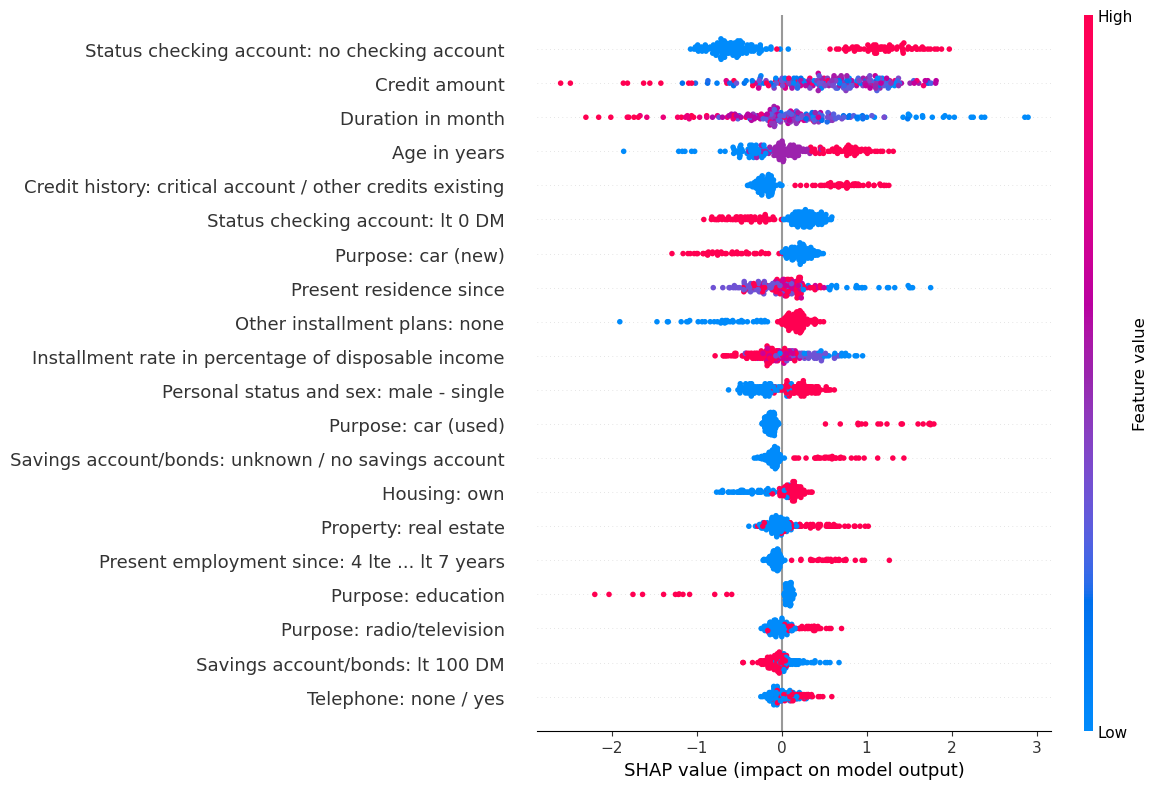

In [ ]:
shap.summary_plot(fair_shap_values, X_test, plot_size=(12, 8))

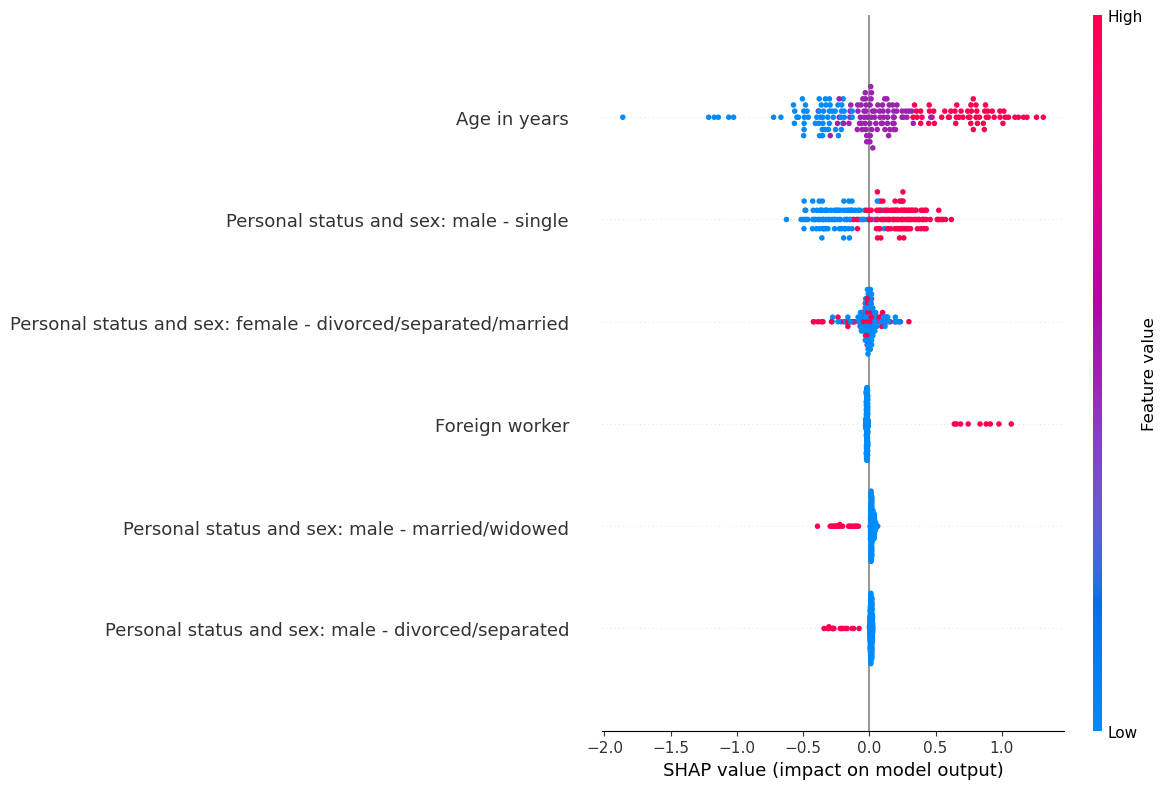

In [ ]:
shap.summary_plot(prot_att_shap_vals, X_test[protected_attributes], plot_size=(12, 8))

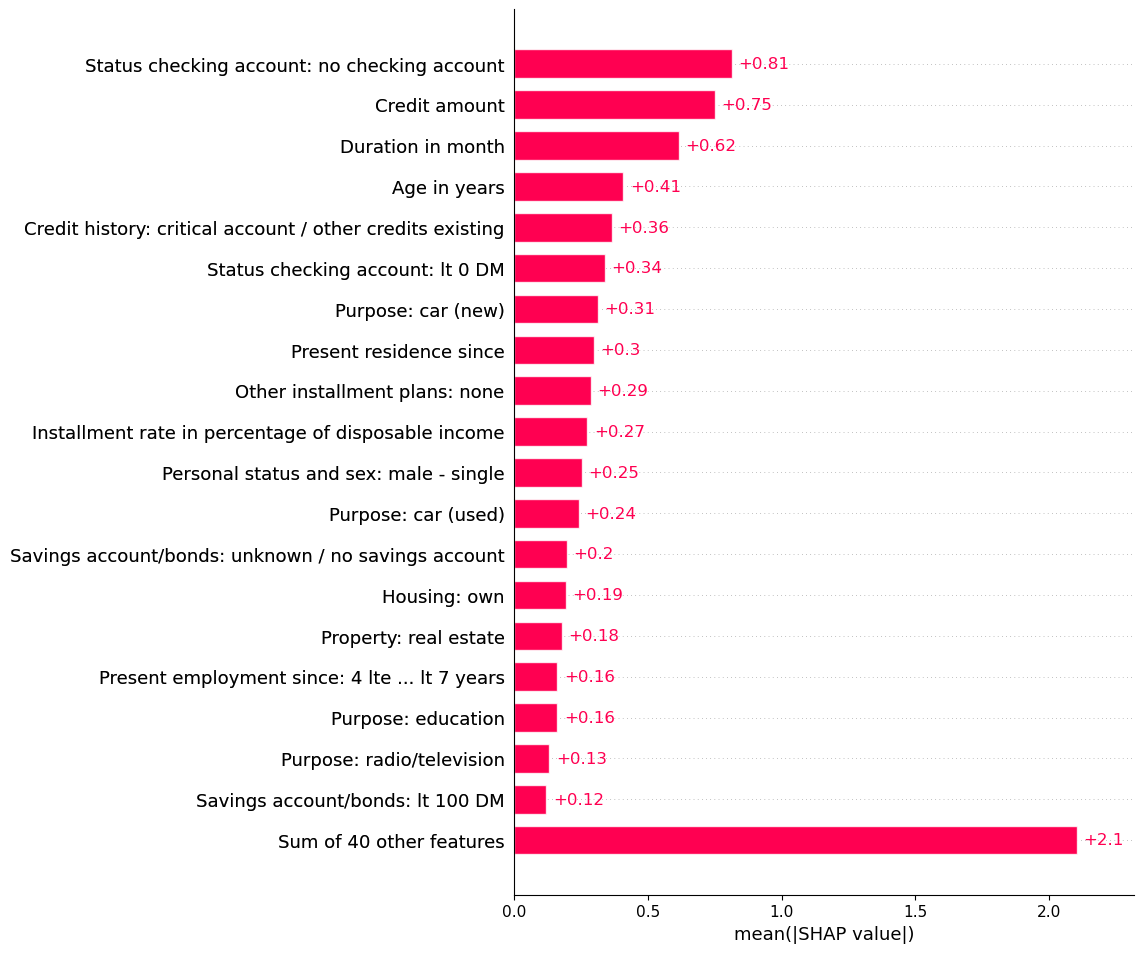

In [ ]:
shap.plots.bar(fair_shap_values, max_display=20)

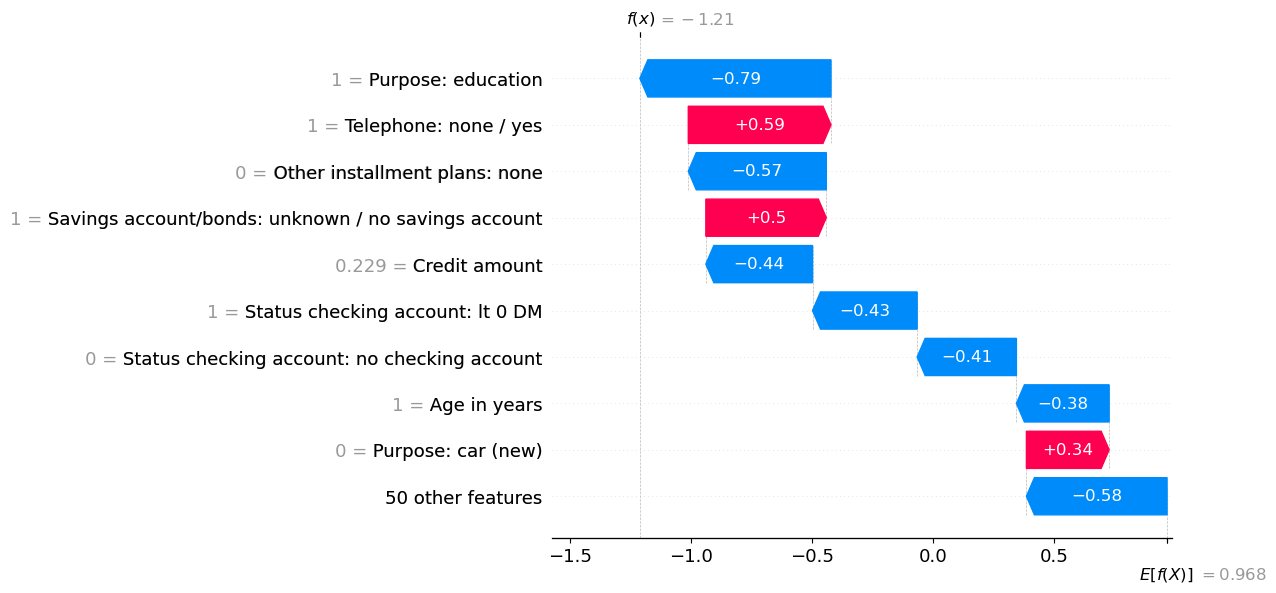

In [ ]:
shap.plots.waterfall(fair_shap_values[rand_idx])

# compared to before age is not as important for a particular individual sample

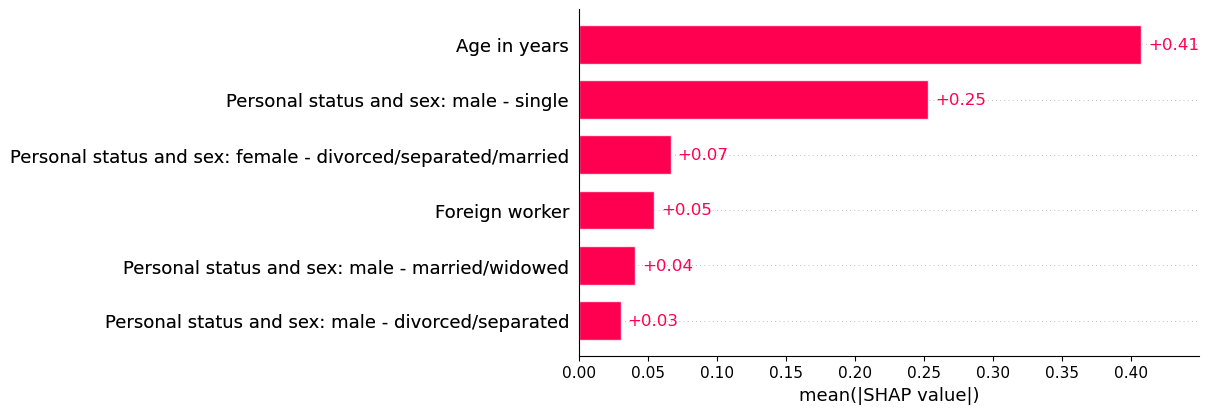

In [ ]:
shap.plots.bar(prot_att_shap_vals)

# Quantify Change in Behavior Across Explanations

<Axes: >

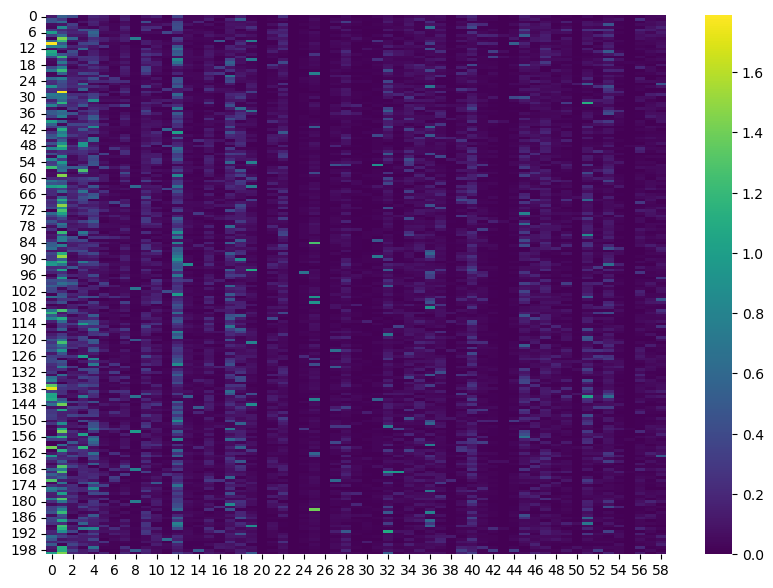

In [ ]:
# compute distance between the two shap value matricies 

diff = abs(fair_shap_values.values - xgb_shap_values.values)

plt.figure(figsize=(10, 7))
sns.heatmap(diff, cmap="viridis")

# the lighter columns are features which changed the most (ex. col 0, 1, 12)

Age in years changed by: 0.0779
Foreign worker changed by: 0.0182
Personal status and sex: male - divorced/separated changed by: 0.0059
Personal status and sex: female - divorced/separated/married changed by: 0.0114
Personal status and sex: male - single changed by: 0.0011
Personal status and sex: male - married/widowed changed by: 0.0008


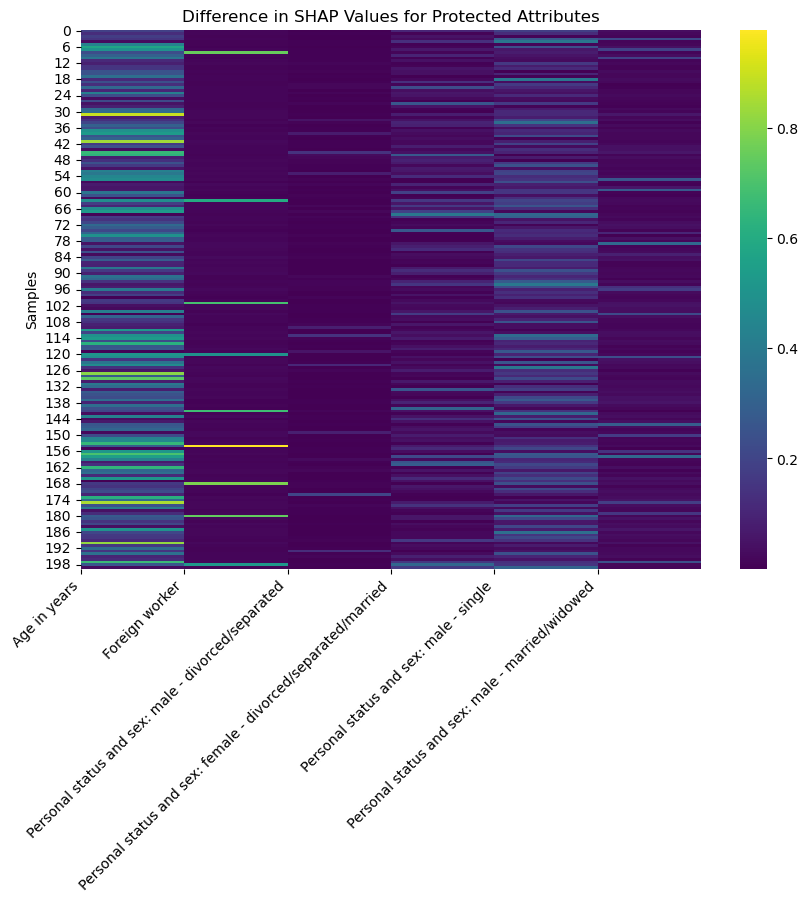

In [ ]:
diff = abs(fair_shap_values.values[:, prot_att_idx] - xgb_shap_values.values[:, prot_att_idx])

plt.figure(figsize=(10, 7))

ax = sns.heatmap(diff, cmap="viridis")
ax.set_xticks(range(len(protected_attributes)))
ax.set_xticklabels(protected_attributes, rotation=45, ha='right')

plt.ylabel("Samples")
plt.title("Difference in SHAP Values for Protected Attributes")

for feature in protected_attributes:
    idx = np.where(np.array(protected_attributes) == feature)
    print(f"{feature} changed by: {abs(np.mean(fair_shap_values.values[:, prot_att_idx[idx]], axis=0) - np.mean(xgb_shap_values.values[:, prot_att_idx[idx]], axis=0))[0]:.4f}")

Text(0.5, 0.98, 'random samples colored by their attribute change')

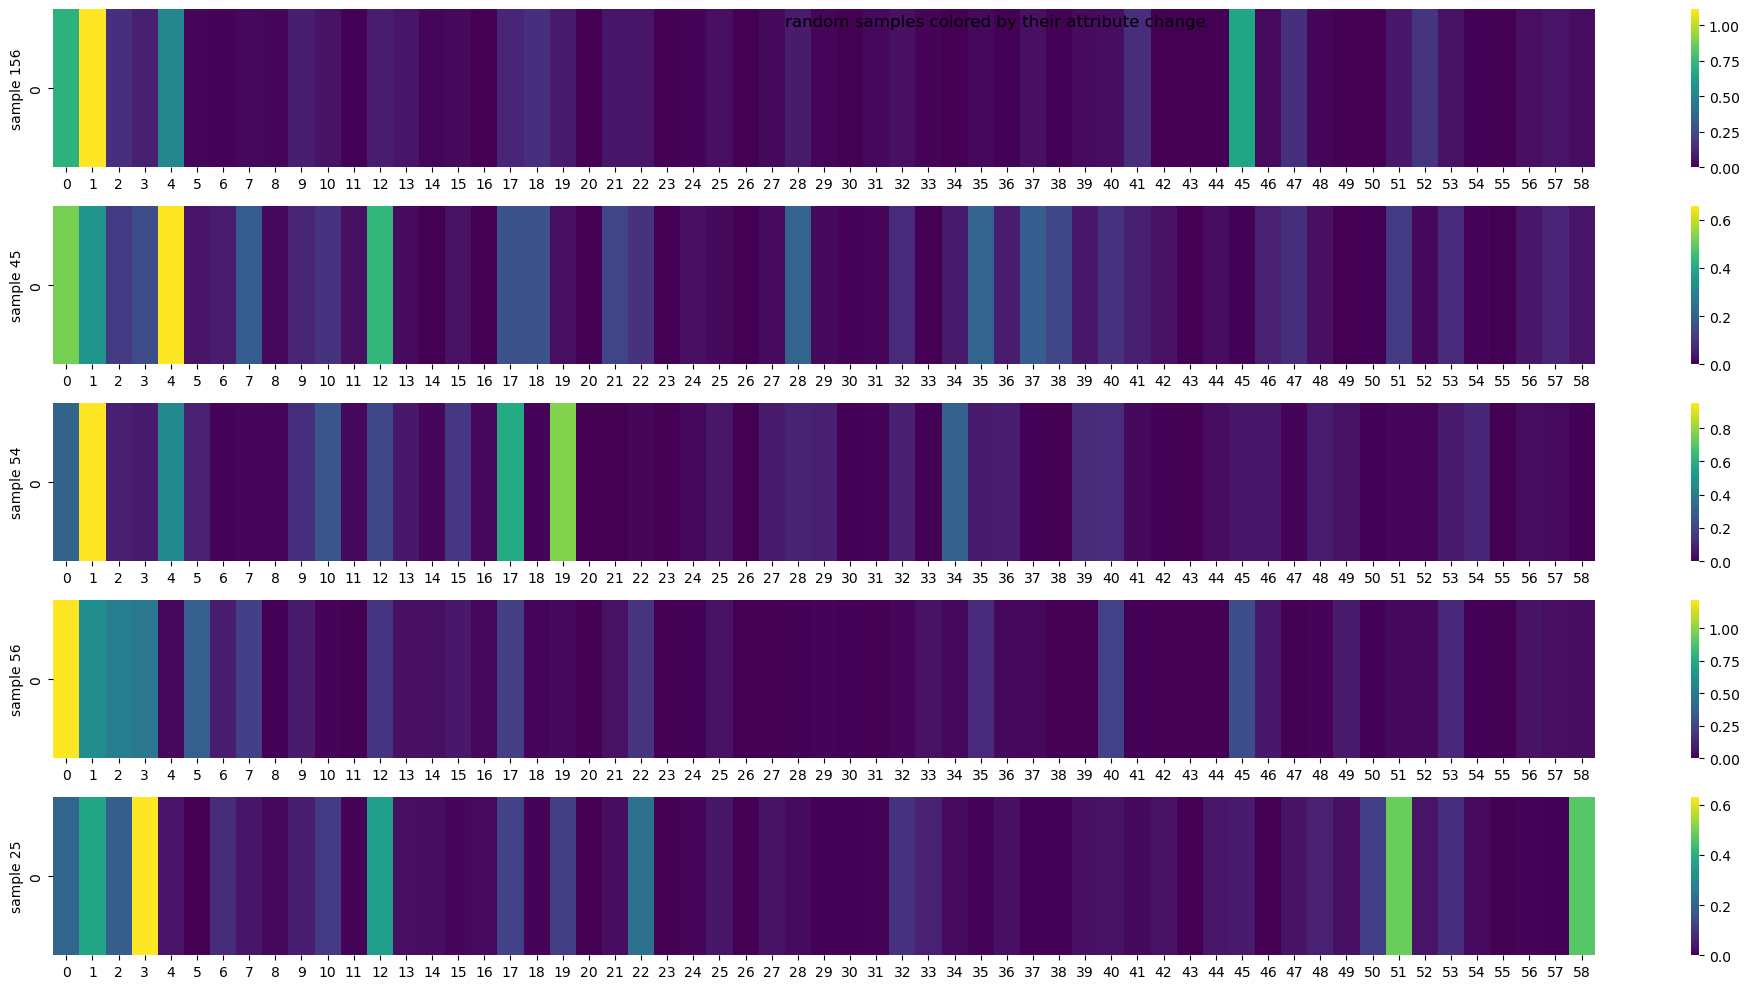

In [ ]:
# add changes also for local smaples

diff = abs(fair_shap_values.values - xgb_shap_values.values)

fig, ax = plt.subplots(5, 1, figsize=(20, 10))

for i in range(5):
    idx = randint(0, len(fair_shap_values))
    sns.heatmap(diff[idx].reshape(1, -1), cmap="viridis", ax=ax[i])
    ax[i].set_ylabel(f"sample {idx}")
    
plt.tight_layout()
fig.suptitle("random samples colored by their attribute change")